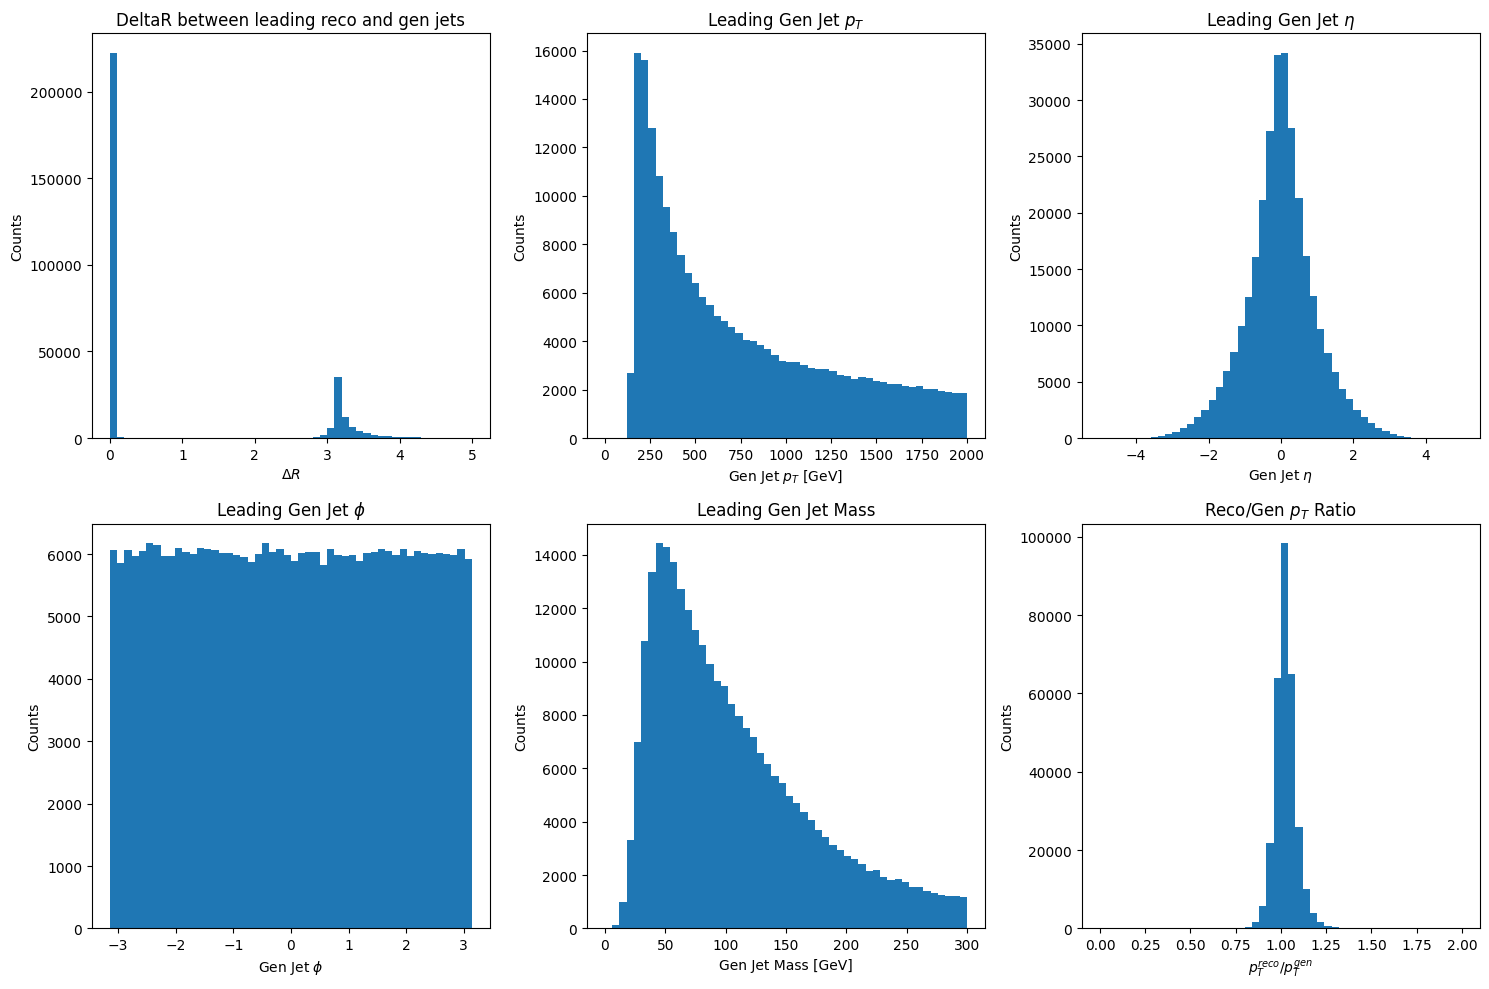

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

# Open the ROOT file and get the tree
qcd_mc = uproot.open('Data2.root')
uprootevents = qcd_mc['Events']

# Extract the leading jet properties for both reco and gen jets
jet_reco_pt = uprootevents['FatJet_pt'].array()[:, :1]
jet_reco_eta = uprootevents['FatJet_eta'].array()[:, :1]
jet_reco_phi = uprootevents['FatJet_phi'].array()[:, :1]
jet_reco_mass = uprootevents['FatJet_mass'].array()[:, :1]

jet_gen_pt = uprootevents['GenJetAK8_pt'].array()[:, :1]
jet_gen_eta = uprootevents['GenJetAK8_eta'].array()[:, :1]
jet_gen_phi = uprootevents['GenJetAK8_phi'].array()[:, :1]
jet_gen_mass = uprootevents['GenJetAK8_mass'].array()[:, :1]

# Filter out events where either the reco or gen jet is missing
mask = (ak.num(jet_reco_pt, axis=1) > 0) & (ak.num(jet_gen_pt, axis=1) > 0)

jet_reco_pt = jet_reco_pt[mask]
jet_reco_eta = jet_reco_eta[mask]
jet_reco_phi = jet_reco_phi[mask]
jet_reco_mass = jet_reco_mass[mask]

jet_gen_pt = jet_gen_pt[mask]
jet_gen_eta = jet_gen_eta[mask]
jet_gen_phi = jet_gen_phi[mask]
jet_gen_mass = jet_gen_mass[mask]

# Calculate DeltaR between leading reco and leading gen jets
delta_eta = jet_reco_eta - jet_gen_eta
delta_phi = np.mod(jet_reco_phi - jet_gen_phi + np.pi, 2 * np.pi) - np.pi
delta_r = np.sqrt(delta_eta**2 + delta_phi**2)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot DeltaR
axs[0, 0].hist(ak.flatten(delta_r), bins=50, range=(0, 5))
axs[0, 0].set_xlabel(r'$\Delta R$')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].set_title('DeltaR between leading reco and gen jets')

# Plot leading gen jet properties
axs[0, 1].hist(ak.flatten(jet_gen_pt), bins=50, range=(0, 2000))
axs[0, 1].set_xlabel('Gen Jet $p_T$ [GeV]')
axs[0, 1].set_ylabel('Counts')
axs[0, 1].set_title('Leading Gen Jet $p_T$')

axs[0, 2].hist(ak.flatten(jet_gen_eta), bins=50, range=(-5, 5))
axs[0, 2].set_xlabel('Gen Jet $\eta$')
axs[0, 2].set_ylabel('Counts')
axs[0, 2].set_title('Leading Gen Jet $\eta$')

axs[1, 0].hist(ak.flatten(jet_gen_phi), bins=50, range=(-np.pi, np.pi))
axs[1, 0].set_xlabel('Gen Jet $\phi$')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].set_title('Leading Gen Jet $\phi$')

axs[1, 1].hist(ak.flatten(jet_gen_mass), bins=50, range=(0, 300))
axs[1, 1].set_xlabel('Gen Jet Mass [GeV]')
axs[1, 1].set_ylabel('Counts')
axs[1, 1].set_title('Leading Gen Jet Mass')

# Plot ratios
pt_ratio = jet_reco_pt / jet_gen_pt
mass_ratio = jet_reco_mass / jet_gen_mass

axs[1, 2].hist(ak.flatten(pt_ratio), bins=50, range=(0, 2))
axs[1, 2].set_xlabel('$p_{T}^{reco} / p_{T}^{gen}$')
axs[1, 2].set_ylabel('Counts')
axs[1, 2].set_title('Reco/Gen $p_T$ Ratio')

plt.tight_layout()
plt.show()
